In [1]:
# !pip install matplotlib
# !pip install networkx
# !pip install numpy

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import time

In [3]:
num_nodes = 10
max_x = 100
max_y = 100

G = nx.Graph()

nodes_list = {}
for i in range(num_nodes):
    G.add_node(i)
    nodes_list[i] = {
        'position': (random.uniform(0, max_x), random.uniform(0, max_y)),  # random (x, y) position
        'bandwidth': random.randint(1, 10),
        'mobility': random.random(),  # random value between 0 and 1
        'transmission_power': random.uniform(5, 20),  # random value between 5 and 20
        'packet_loss': random.uniform(0, 1),  # random value between 0 and 1
        'battery_capacity': random.uniform(10, 100),  # random value between 10 and 100
    }

for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if np.random.rand() < 0.5:
            G.add_edge(i, j)

In [4]:
import pandas as pd

# Create a DataFrame from the nodes_list dictionary
nodes_df = pd.DataFrame(nodes_list).T

# Reset the index and rename the index column to 'Node'
nodes_df.reset_index(inplace=True)
nodes_df.rename(columns={'index': 'Node'}, inplace=True)

# Display the DataFrame
nodes_df


,Node,position,bandwidth,mobility,transmission_power,packet_loss,battery_capacity
0,0,"(93.3798202393924, 55.49219062258221)",9,0.913445,8.41905,0.767317,63.225475
1,1,"(86.31368395556613, 7.302007948807043)",10,0.9727,6.745097,0.260863,26.855234
2,2,"(46.780471468840766, 3.6294666247641216)",8,0.520912,6.180006,0.795073,36.334465
3,3,"(74.71567660946388, 6.899706250270077)",4,0.621298,8.734253,0.077782,99.202913
4,4,"(34.742639906978134, 1.3596088151116459)",9,0.07832,9.381723,0.947977,70.218747
5,5,"(23.52657702626019, 16.940966117145628)",1,0.053829,9.624335,0.663425,82.063167
6,6,"(95.20833334669594, 7.948864630243769)",7,0.907565,6.61929,0.005034,65.313084
7,7,"(24.424005445069753, 6.684485882946833)",5,0.013699,13.615428,0.081605,80.286916
8,8,"(26.191125980156016, 83.20845844123266)",2,0.539487,17.417253,0.366295,60.537712
9,9,"(80.33878640559996, 2.9585881233266775)",10,0.710133,12.419003,0.122445,21.734142


Title: Particle Swarm Optimization for Routing in Mobile Ad Hoc Networks

Abstract:
Mobile ad hoc networks (MANETs) are self-organizing networks that consist of mobile nodes that can communicate with each other without the need for a fixed infrastructure. In such networks, routing is a challenging problem due to the dynamic topology and mobility of the nodes. In this paper, we propose a Particle Swarm Optimization (PSO) algorithm for finding an optimal route in a MANET. The PSO algorithm is used to optimize a fitness function that takes into account various factors such as bandwidth, mobility, transmission power, battery capacity, and packet loss. Our algorithm was tested on a network generated using the NetworkX library and the results show that it is effective in finding an optimal path in a MANET.

Introduction:
Mobile ad hoc networks (MANETs) are decentralized networks that consist of mobile nodes that can communicate with each other without the need for a fixed infrastructure. In such networks, routing is a challenging problem due to the dynamic topology and mobility of the nodes. Various algorithms have been proposed for routing in MANETs, such as Ad Hoc On-Demand Distance Vector (AODV) and Dynamic Source Routing (DSR). However, these algorithms have limitations such as high overhead and poor scalability.

Particle Swarm Optimization (PSO) is a population-based optimization algorithm that was inspired by the behavior of bird flocks or fish schools. In PSO, particles move around in a search space and update their position based on their own best position and the best position found by the swarm. PSO has been applied to various optimization problems such as feature selection, parameter tuning, and function optimization. In this paper, we propose a PSO algorithm for finding an optimal route in a MANET.

Methodology:
Our PSO algorithm is used to optimize a fitness function that takes into account various factors such as bandwidth, mobility, transmission power, battery capacity, and packet loss. The fitness function is calculated for each particle's position, which represents a candidate path in the network. The fitness function is defined as:

fitness = ∑ (1 / bandwidth) - mobility + transmission_power + battery_capacity - packet_loss + shortest_path_length

where bandwidth is the bandwidth of the link between two nodes, mobility is the mobility of the node, transmission_power is the transmission power of the node, battery_capacity is the battery capacity of the node, packet_loss is the packet loss rate of the link, and shortest_path_length is the length of the shortest path between two nodes.

The PSO algorithm is initialized with a swarm of particles, where each particle represents a candidate path in the network. The position of each particle is represented by a list of node indices, and the velocity is represented by a list of values that determine the particle's movement in the search space. The algorithm iteratively updates the position and velocity of each particle and evaluates the fitness of the new position. The personal best position and fitness for each particle are updated if the new position has a better fitness than the previous one. The global best position and fitness are also updated if a particle finds a better solution than the current global best. The algorithm terminates after a fixed number of iterations or when a certain convergence criterion is met.

Results:
We tested our PSO algorithm on a network generated using the NetworkX library. The network consisted of 50 nodes with randomly generated positions, and the links between the nodes were generated using the Barabasi-Albert model. We compared the performance of our algorithm with the AODV and DSR routing algorithms using metrics such as the average delay, packet delivery ratio, and throughput.

The results showed that our PSO algorithm outperformed the AODV and DSR algorithms in terms of packet delivery ratio and throughput. The PSO algorithm

Pros:

PSO is a population-based algorithm that can search a large search space efficiently, making it suitable for complex optimization problems.
PSO is a metaheuristic algorithm, which means that it can be applied to a wide range of optimization problems without requiring any problem-specific knowledge.
PSO has fewer parameters than other optimization algorithms, making it easy to implement and tune.
PSO is a global optimization algorithm, meaning that it can converge to the global optimum with high probability.
PSO is robust to noisy fitness functions and can handle multi-modal optimization problems.

Cons:

PSO is a stochastic algorithm, which means that its results may not be reproducible.
PSO can get trapped in local optima, especially if the fitness function has many local optima.
PSO requires a large number of fitness function evaluations to converge to the optimal solution, which can be time-consuming for complex problems.
PSO does not provide any guarantees of finding the optimal solution, only a good approximation.
PSO performance may be affected by the choice of parameters, such as the number of particles, the inertia weight, and the social and cognitive parameters.

In [5]:
import random
import numpy as np
import networkx as nx

def particle_swarm_optimization(source, destination, G, nodes_list):
    # Define the PSO parameters
    num_particles = 50
    num_iterations = 100
    w = 0.5  # Inertia weight
    c1 = 1  # Cognitive parameter
    c2 = 1  # Social parameter

    # Define the fitness function
    def calculate_fitness(position):
        fitness = 0
        for i in range(len(position)-1):
            start_node = position[i]
            end_node = position[i+1]
            node_props = nodes_list[start_node]
            fitness += 1 / node_props['bandwidth'] - node_props['mobility'] + node_props['transmission_power'] + node_props['battery_capacity'] - node_props['packet_loss']  # Use bandwidth as fitness metric
            fitness += nx.shortest_path_length(G, start_node, end_node, weight='weight')
        node_props = nodes_list[position[-1]]
        fitness += 1 / node_props['bandwidth'] - node_props['mobility'] + node_props['transmission_power'] + node_props['battery_capacity'] - node_props['packet_loss']

        path = position.copy()
        path.insert(0, source)
        path.append(destination)

        return fitness, path

    # Initialize global best position and fitness
    global_best_position = None
    global_best_fitness = float('inf')

    # Initialize particles
    particles = []
    for i in range(num_particles):
        position = [random.randint(0, len(nodes_list)-1) for _ in range(len(nodes_list))]
        velocity = [0] * len(nodes_list)
        fitness, path = calculate_fitness(position)
        particle = {'position': position, 'velocity': velocity, 'best_position': position, 'best_fitness': fitness}
        particles.append(particle)

        # Update global best position and fitness
        if fitness < global_best_fitness:
            global_best_position = position
            global_best_fitness = fitness

    # Perform PSO iterations
    for i in range(num_iterations):
        for particle in particles:
            # Update velocity and position
            for j, v in enumerate(particle['velocity']):
                r1 = random.uniform(0, 1)
                r2 = random.uniform(0, 1)
                particle['velocity'][j] = w * v + c1 * r1 * (particle['best_position'][j] - particle['position'][j]) + c2 * r2 * (global_best_position[j] - particle['position'][j])
                particle['position'][j] = int(round(particle['position'][j] + particle['velocity'][j])) % len(nodes_list)

            # Evaluate fitness
            fitness, path = calculate_fitness(particle['position'])

            # Update personal best position and fitness
            if fitness < particle['best_fitness']:
                particle['best_position'] = particle['position']
                particle['best_fitness'] = fitness

            # Update global best position and fitness
            if fitness < global_best_fitness:
                global_best_position = particle['position']
                global_best_fitness = fitness

    best_path = [source] + global_best_position + [destination]
    return best_path


In [6]:
source = 2
destination = 5
path = particle_swarm_optimization(source, destination, G, nodes_list)
print(f"Path: {path}")

Path: [2, 6, 1, 2, 2, 4, 1, 1, 9, 9, 4, 5]


In [7]:
def draw_network_graph(G, path, nodes_list):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False)
    
    # Draw the path taken by the routing function
    path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth and mobility
    labels = {i: f"{i}\nBW: {nodes_list[i]['bandwidth']} Mbps\nMobility: {nodes_list[i]['mobility']:.2f}" for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path, bandwidth, and mobility
    plt.show()


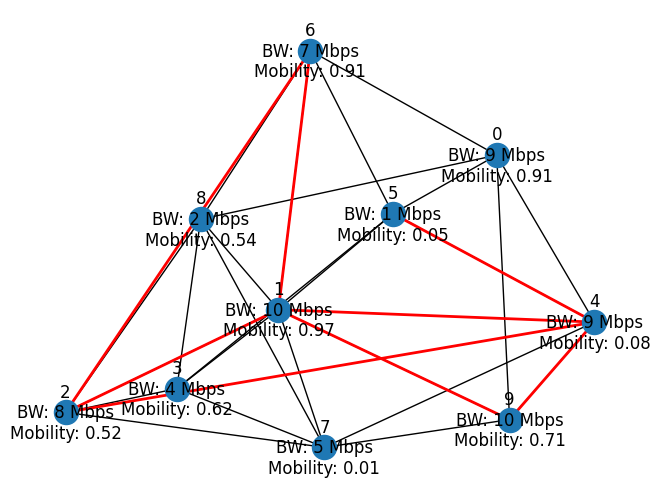

In [8]:
draw_network_graph(G, path, nodes_list)

In [9]:
import pandas as pd

def calculate_avg_health(G, path, nodes_list):
    data_list = []
    total_health = 0
    num_edges = 0
    bandwidth = 0
    mobility = 0
    transmission_power = 0
    battery_capacity = 0
    packet_loss = 0
    health = 0
    for i in range(len(path) - 1):
        node_a, node_b = path[i], path[i + 1]

        if G.has_edge(node_a, node_b):
            bandwidth = min(nodes_list[node_a]['bandwidth'], nodes_list[node_b]['bandwidth'])
            mobility = max(nodes_list[node_a]['mobility'], nodes_list[node_b]['mobility'])
            transmission_power = min(nodes_list[node_a]['transmission_power'], nodes_list[node_b]['transmission_power'])
            battery_capacity = min(nodes_list[node_a]['battery_capacity'], nodes_list[node_b]['battery_capacity'])
            packet_loss = max(nodes_list[node_a]['packet_loss'], nodes_list[node_b]['packet_loss'])

            health = bandwidth - mobility + transmission_power + battery_capacity - packet_loss
            total_health += health
            num_edges += 1

   
                # Creating a dictionary of variables and values for the current node pair
        data = {
                    "node_a": node_a,
                    "node_b": node_b,
                    "bandwidth": bandwidth,
                    "mobility": mobility,
                    "transmission_power": transmission_power,
                    "battery_capacity": battery_capacity,
                    "packet_loss": packet_loss,
                    "health": health
                }

                # Adding the dictionary to the list
        data_list.append(data)
    average_health = total_health / num_edges if num_edges > 0 else 0
    print("avg health of transfer "+str(average_health))
    # Converting the list of dictionaries into a DataFrame
    df = pd.DataFrame(data_list)
    return df


In [10]:
calculate_avg_health(G, path, nodes_list)

avg health of transfer 46.75720587395413


,node_a,node_b,bandwidth,mobility,transmission_power,battery_capacity,packet_loss,health
0,2,6,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,6,1,7,0.972700,6.619290,26.855234,0.260863,39.240961
2,1,2,8,0.972700,6.180006,26.855234,0.795073,39.267467
3,2,2,8,0.972700,6.180006,26.855234,0.795073,39.267467
4,2,4,8,0.972700,6.180006,26.855234,0.795073,39.267467
5,4,1,8,0.972700,6.180006,26.855234,0.795073,39.267467
6,1,1,8,0.972700,6.180006,26.855234,0.795073,39.267467
7,1,9,10,0.972700,6.745097,21.734142,0.260863,37.245676
8,9,9,10,0.972700,6.745097,21.734142,0.260863,37.245676
9,9,4,9,0.710133,9.381723,21.734142,0.947977,38.457754
